In [1]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv ("nasa.csv")

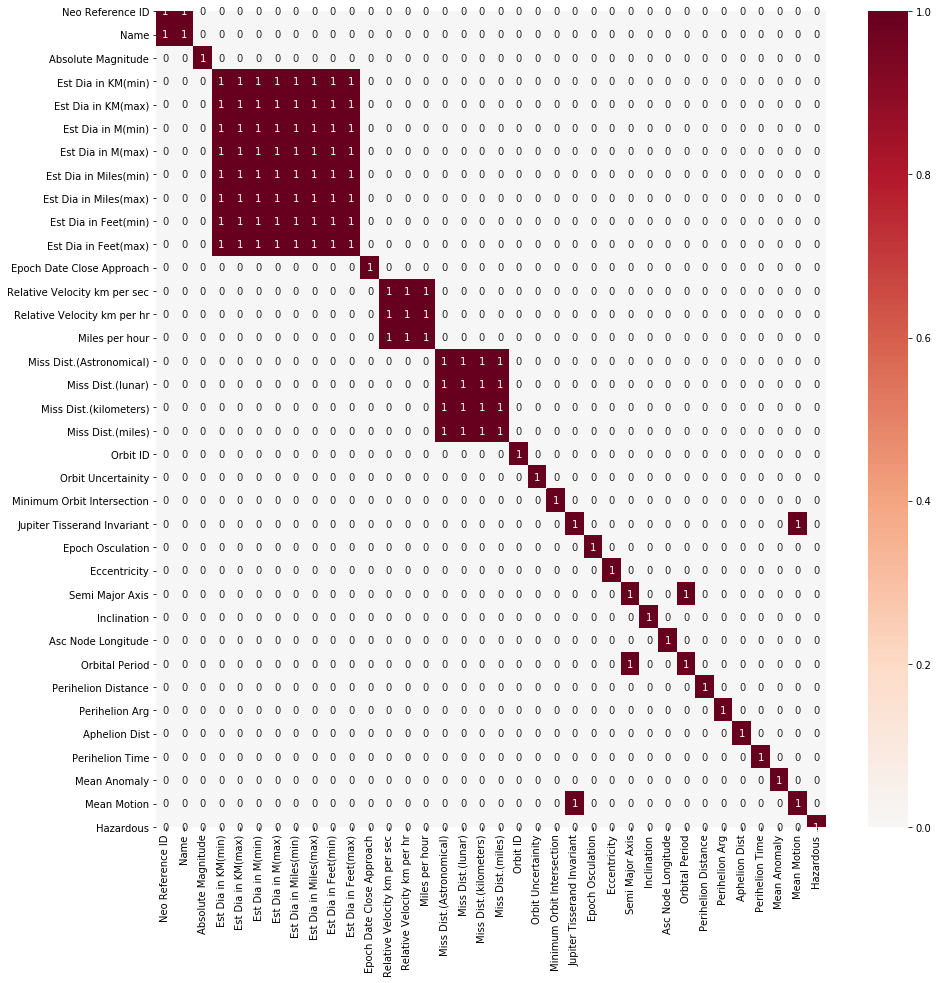

In [3]:
#heatmap of data
corr = data.corr()
high_corr = (corr >= 0.98).astype('uint8')
plt.figure(figsize=(15,15))
sns.heatmap(high_corr, cmap='RdBu_r', annot=True, center=0.0)
plt.show()

In [4]:
#deleting unnecessary data
del data ['Est Dia in M(min)']
del data ['Est Dia in M(max)']
del data ['Est Dia in Miles(min)']
del data ['Est Dia in Miles(max)']
del data ['Est Dia in Feet(min)']
del data ['Est Dia in Feet(max)']
del data ['Relative Velocity km per hr']
del data ['Miles per hour']
del data ['Miss Dist.(lunar)']
del data ['Miss Dist.(kilometers)']
del data ['Miss Dist.(miles)']
del data ['Orbiting Body']
del data ['Equinox']
del data ['Orbit Determination Date']
del data ['Close Approach Date']
data.head

<bound method NDFrame.head of       Neo Reference ID     Name  Absolute Magnitude  Est Dia in KM(min)  \
0              3703080  3703080              21.600            0.127220   
1              3723955  3723955              21.300            0.146068   
2              2446862  2446862              20.300            0.231502   
3              3092506  3092506              27.400            0.008801   
4              3514799  3514799              21.600            0.127220   
...                ...      ...                 ...                 ...   
4682           3759007  3759007              23.900            0.044112   
4683           3759295  3759295              28.200            0.006089   
4684           3759714  3759714              22.700            0.076658   
4685           3759720  3759720              21.800            0.116026   
4686           3772978  3772978              19.109            0.400641   

      Est Dia in KM(max)  Epoch Date Close Approach  \
0             

In [5]:
#dimensions of data
data.shape

(4687, 25)

In [6]:
#assigning the values to respective variables
features = data.iloc [:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]]
labels = data.iloc [:, [24]]

In [7]:
#data normalization
scaler = MinMaxScaler()
scaler.fit (features)
features_transform = scaler.transform (features)
print (features_transform)

[[0.95575717 0.95575717 0.49856734 ... 0.92250213 0.7358251  0.25823873]
 [0.96747507 0.96747507 0.48424069 ... 0.88054178 0.48271958 0.38871266]
 [0.2505967  0.2505967  0.4364852  ... 0.91779034 0.81377721 0.24227093]
 ...
 [0.98754788 0.98754788 0.55109838 ... 0.93839013 0.56540591 0.22297844]
 [0.98755125 0.98755125 0.50811843 ... 0.9369919  0.56547209 0.23428006]
 [0.99499344 0.99499344 0.3796084  ... 0.94046222 0.51350273 0.23784536]]


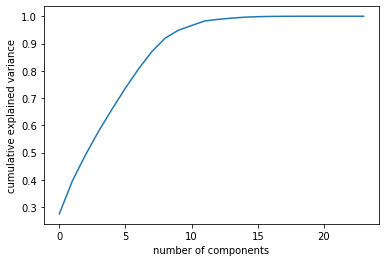

In [8]:
#applying principal component analysis
pca = PCA(n_components=24).fit(features_transform)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()

In [9]:
pca = PCA (n_components = 13)
principle_components = pca.fit_transform (features_transform)
principleDf = pd.DataFrame(data = principle_components)

In [10]:
labels
labels = np.asarray(labels)
print (labels)

[[ True]
 [False]
 [ True]
 ...
 [False]
 [False]
 [False]]


In [11]:
#splitting data into train and test using default test_size=0.25
X_train, X_test, y_train, y_test = train_test_split (principleDf, labels)

In [12]:
#checks for null values
data.isnull().values.any()

False

In [13]:
#applying support vector machine algorithm
model = SVC()
model.fit(X_train, y_train)

C:\Users\mohds\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mohds\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [14]:
y_pred = model.predict (X_test)

In [15]:
accuracy = accuracy_score (y_pred, y_test)
print (accuracy) 

0.8848122866894198


In [16]:
print(y_pred)
print(y_test)

[False False False ... False False False]
[[False]
 [ True]
 [False]
 ...
 [False]
 [False]
 [ True]]


In [17]:
#applying logistic regression
LRModel = LogisticRegression().fit(X_train, y_train)
LRPredict = LRModel.predict(X_test)

C:\Users\mohds\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mohds\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [18]:
accuracy1 = accuracy_score (LRPredict, y_test)
print(accuracy1)

0.9104095563139932
